# Cегментация клиентов

Анализ личности клиента - это детальный анализ идеальных клиентов компании. Это помогает бизнесу лучше понимать своих клиентов и облегчает им модификацию продуктов в соответствии с конкретными потребностями, поведением и озабоченностями различных типов клиентов.

Анализ личности клиента помогает бизнесу модифицировать свой продукт в зависимости от его целевых клиентов из различных типов потребительских сегментов. Например, вместо того, чтобы тратить деньги на продвижение нового продукта каждому клиенту в базе данных компании, компания может проанализировать, какой сегмент клиентов с наибольшей вероятностью купит продукт, а затем продавать продукт только в этом конкретном сегменте.

Задача относится к классу задач обучения без учителя **unsupervised learning** – когда у нас отсутствуют метки классов, мы должны по данным выявить некую закономерность, объединить объекты по схожим признакам, чтобы группы (кластеры) были различны друг от друга как можно больше.

Применение:

Разбиение текста по темам (тематическое моделирование), выявление паттернов поведения, либо групп (клиентов по типу поведения), поиск аномалий, построение иерархий объектов.


**Постановка задачи**

Дано:

- $X$ – пространство объектов
- $X^{l}=\left \{x_{1}, x_{2}, ...,x_{l}\right \}$ – обучающая выборка
- $\rho$ – функция расстояния между объектами

Найти:
- $Y$ – множество кластеров
- $a$ – алгоритм кластеризации

## Описание данных

**Клиенты**

- `ID`: Уникальный идентификатор клиента
- `Year_Birth`: Год рождения клиента
- `Education`: Уровень образования
- `Marital_Status`: Семейное положение
- `Income`: Годовой доход
- `Kidhome`: Количество детей в семье клиента
- `Teenhome`: Количество подростков в семье клиента
- `Dt_Customer`: Дата регистрации клиента в компании
- `Recency`: Количество дней с момента последней покупки клиента
- `Complain`: 1, если клиент жаловался в течение последних 2 лет, 0 в противном случае

**Суммы, потраченные на различные категории товаров**

- `MntWines`: Сумма, потраченная на вино за последние 2 года
- `MntFruits`: Сумма, потраченная на фрукты за последние 2 года
- `MntMeatProducts`: Сумма, потраченная на мясо за последние 2 года
- `MntFishProducts`: Сумма, потраченная на рыбу за последние 2 года
- `MntSweetProducts`: Сумма, потраченная на сладости за последние 2 года
- `MntGoldProds`: Сумма, потраченная на золото за последние 2 года

**Участие клиента в промоакциях**

- `NumDealsPurchases`: Количество покупок, совершенных со скидкой
- `AcceptedCmp1`: 1, если клиент принял предложение в 1-й кампании, 0 в противном случае
- `AcceptedCmp2`: 1, если клиент принял предложение во 2-й кампании, 0 в противном случае
- `AcceptedCmp3`: 1, если клиент принял предложение во 3-й кампании, 0 в противном случае
- `AcceptedCmp4`: 1, если клиент принял предложение во 4-й кампании, 0 в противном случае
- `AcceptedCmp5`: 1, если клиент принял предложение во 5-й кампании, 0 в противном случае
- `Response`: 1, если клиент принял предложение в последней кампании, 0 в противном случае

**Количество покупок по способу приобретения**

- `NumWebPurchases`: Количество покупок, совершенных через веб-сайт компании
- `NumCatalogPurchases`: Количество покупок, сделанных с использованием каталога
- `NumStorePurchases`: Количество покупок, совершенных непосредственно в магазинах
- `NumWebVisitsMonth`: Количество посещений веб-сайта компании за последний месяц

**Задача**

- Провести сегментацию клиентов на основе их предпочтений

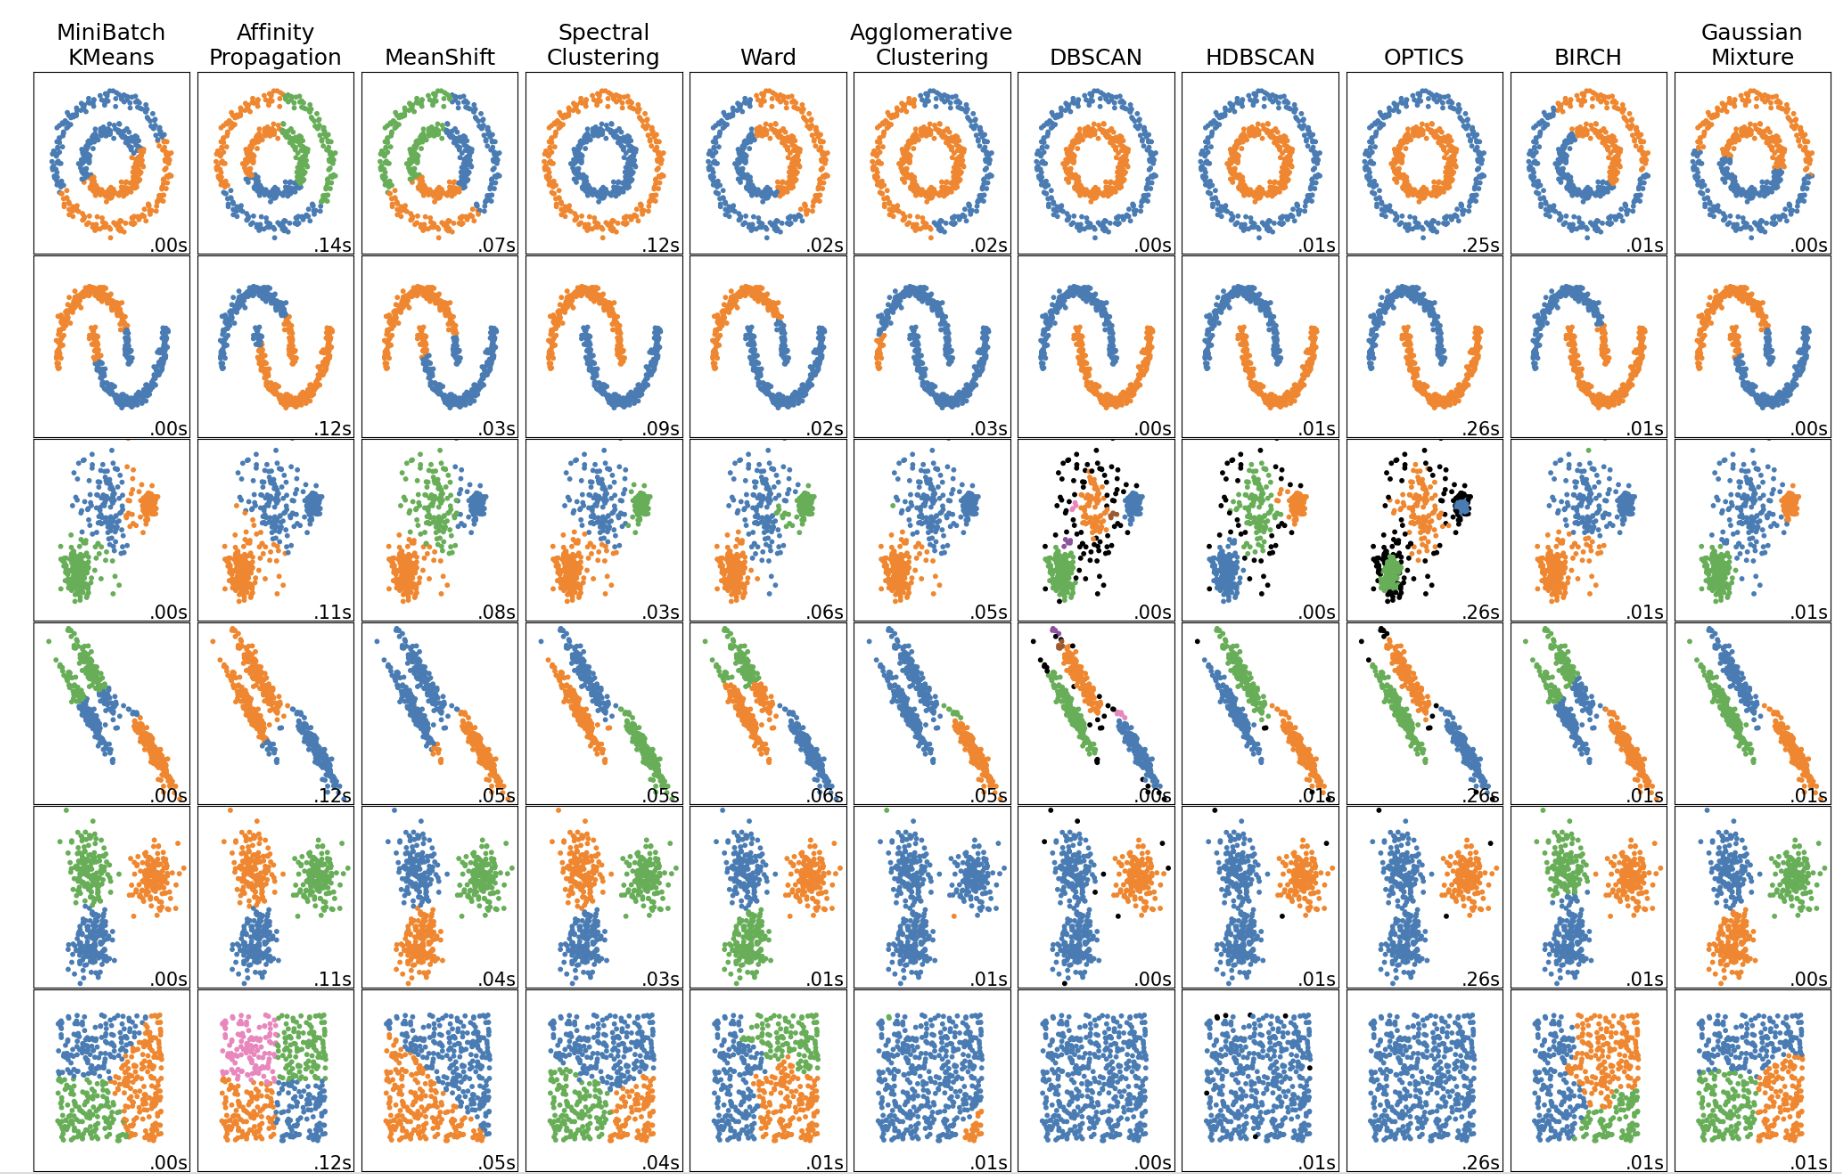

In [1]:
pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=49ea42d6af9f6c74397b2f5fb821500c46baa96f9bb6271caf465cb95cee5793
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [2]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.5 MB/s eta 0:00:00


## EDA

In [3]:
import pandas as pd
import numpy as np

from typing import Tuple

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.manifold import TSNE
import umap
import umap.umap_ as UMAP


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN, OPTICS, SpectralClustering, AffinityPropagation
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer, ClusteringScoreVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

import plotly.express as px
from tqdm import tqdm_notebook

import warnings
warnings.filterwarnings("ignore")


**Прочитаем файл в переменную `df`**

In [4]:
try:
    df = pd.read_csv('marketing_campaign.csv', sep='\t')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    df = pd.read_csv('/content/drive/My Drive/marketing_campaign.csv', sep='\t')



Mounted at /content/drive


In [5]:
# первые 5 строк
df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [6]:
# общая информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

В столбце даты регистрации клиента тип данных не соответвтует типу даты. Видим, что имеются пропущенные значения в стоблце `Income`. Оценим их долю в общем объеме данных.

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format='%d-%m-%Y')


In [8]:
# Пропуски в столбце 'Income'
df['Income'].isnull().mean()

0.010714285714285714

Количество пропущенных значений составляет около 1%. Можно либо удалить строки с пропусками, либо заменить пропущенные значения медианными значениями. Удалим пропущенные значения методом `dropna`

In [9]:
df.dropna(inplace= True)


Изучим числовые характеристики количественных признаков.

In [10]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2216.000000  2216.000000    2216.000000  2216.000000  2216.000000   
mean    5588.353339  1968.820397   52247.251354     0.441787     0.505415   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2814.750000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8421.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3249.376275    11.985554   25173.076661     0.536896     0.544181   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2216  2216.000000  2216.000000  2216.000000   
mean   2013-07-10 11:29:27.509025280    49.012635   305.091606    26.356047   
min              2012-07-30 00:00:00     0.000000     0.000000     0.000000   
25%              2013-01-16 00:00:00    24.000000    24.000000     2.000000   
50%              2013-07-08 12:00:00    49.000000   174.500000     8.000000   
75%              2013-12-31 00:00:00    74.000000   505.000000    33.000000   
max              2014-06-29 00:00:00    99.000000  1493.000000   199.000000   
std                              NaN    28.948352   337.327920    39.793917   

       MntMeatProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2216.000000  ...        2216.000000   2216.000000   2216.000000   
mean        166.995939  ...           5.319043      0.073556      0.074007   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%          16.000000  ...           3.000000      0.000000      0.000000   
50%          68.000000  ...           6.000000      0.000000      0.000000   
75%         232.250000  ...           7.000000      0.000000      0.000000   
max        1725.000000  ...          20.000000      1.000000      1.000000   
std         224.283273  ...           2.425359      0.261106      0.261842   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2216.000000   2216.000000   2216.000000  2216.000000         2216.0   
mean       0.073105      0.064079      0.013538     0.009477            3.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   
std        0.260367      0.244950      0.115588     0.096907            0.0   

       Z_Revenue     Response  
count     2216.0  2216.000000  
mean        11.0     0.150271  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  
std          0.0     0.357417  

[8 rows x 27 columns]

Видим, что среднеквадратическое отклонение равно и все значение в столбцах  `Z_CostContact` и `Z_Revenue` одинаоквые. Проверим уникальные значения в этих столбцах

In [11]:
df['Z_CostContact'].unique()

array([3])

In [12]:
df['Z_Revenue'].unique()

array([11])

Удалим столбцы `Z_CostContact`, `Z_Revenue`, так как во всех объектах одинаковые значения в признаках, а также удалим столбец `ID` как неинформативный.

In [13]:
df.drop(columns=['Z_CostContact','Z_Revenue','ID'], inplace=True)

Определим минимальную и максимальную даты регистрации клиентов

In [14]:
df['Dt_Customer'].min(), df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

Видим, что все клиенты зарегистированы в течение двух лет. Добавим новые признаки - возраст клиента и количество месяцев с момента регистрации клиента.

In [15]:
def get_diffrent_date(end_data: pd.Timestamp,
                      data: Tuple[str, int],
                      type_date: str = 'year') -> int:
    if type_date == 'year':
        time_data = int(end_data.year -
                        pd.to_datetime(data, format='%Y').year)
    elif type_date == 'month':
        time_data = end_data.to_period('M') - pd.to_datetime(
            data, format='%d-%m-%Y').to_period('M')
        time_data = time_data.n
    else:
        time_data = end_data - pd.to_datetime(data)
        time_data = int(time_data.days)
    return time_data

In [16]:
end_data = max(df['Dt_Customer'])
df['Age'] = df['Year_Birth'].apply(lambda x: get_diffrent_date(end_data, x))
df['Month_register'] = df.Dt_Customer.apply(
    lambda x: get_diffrent_date(end_data, x, type_date='month'))

Теперь можно удалить столбцы `Year_Birth` и `Dt_Customer`.

In [17]:
df.drop(columns=['Year_Birth','Dt_Customer'], inplace=True)

Объединим признаки, характеризующие кампании, в которых клиент принял участие. Сформируем новый признак `Num_Campains` - количество кампаний, в которых клиент принял участие. Для этого найдем все столбцы, в названии которых содержится `Accepted`. Используем для этого метод `find()`.

In [18]:
col_acc = [name for name in df.columns if name.find('Accepted')>-1] + ['Response']
df['Num_Campains'] = df[col_acc].sum(axis = 1)

In [19]:
df.head()

Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0  Graduation         Single  58138.0        0         0       58       635   
1  Graduation         Single  46344.0        1         1       38        11   
2  Graduation       Together  71613.0        0         0       26       426   
3  Graduation       Together  26646.0        1         0       26        11   
4         PhD        Married  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp3  \
0         88              546              172  ...             0   
1          1                6                2  ...             0   
2         49              127              111  ...             0   
3          4               20               10  ...             0   
4         43              118               46  ...             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

   Age  Month_register  Num_Campains  
0   57              21             1  
1   60               3             0  
2   49              10             0  
3   30               4             0  
4   33               5             0  

[5 rows x 27 columns]

Аналогичным образом сформируем новый признак `Num_Purchases` - количество покупок по всем способам приобретения товаров. Будем искать в названиях столбцов `Purchases`.

In [20]:
col_pur = [name for name in df.columns if name.find('Purchases')>-1]
df['Num_Purchases'] = df[col_pur].sum(axis = 1)

Аналогичным образом сформируем новый признак `Sum_Purchases` - общая сумма покупок по всем категориям товаров

In [21]:
col_mnt = [name for name in df.columns if name.find('Mnt')>-1]
df['Sum_Purchases'] = df[col_mnt].sum(axis = 1)

Изучим униальные значения в столбце `Marital_Status` и их количество

In [22]:
# Проверим, какие значения имеются для обозначения семейного положения
df['Marital_Status'].value_counts()


Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Видим, что некоторые категории можно объединить. Например, сделать две категории: `Relationship` - в отношениях (совместное проживание) и `Single` - одинокий.

In [23]:
# Создадим словарь для переименования категорий семейного положения клиента
dict_replace_marital = {
    'Married': 'Relationship',
    'Together': 'Relationship',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
}

In [24]:
# Выполним замену названий категорий в столбце 'Marital_Status' методом replace()
df['Marital_Status'] = df['Marital_Status'].replace(dict_replace_marital)

Сформируем ещё один признак `Children` - общее количество детей в семье. Для этого просуммируем значения в столбцах `Kidhome` и `Teenhome`

In [25]:
df['Children'] = df['Kidhome'] + df['Teenhome']

Изучим распределения вероятностей количественных признаков. Посторим графики плотностей вероятностей

In [26]:
# Выделим количественные признаки
num_col = df.select_dtypes(include='number').columns.to_list()
num_col

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response',
 'Age',
 'Month_register',
 'Num_Campains',
 'Num_Purchases',
 'Sum_Purchases',
 'Children']

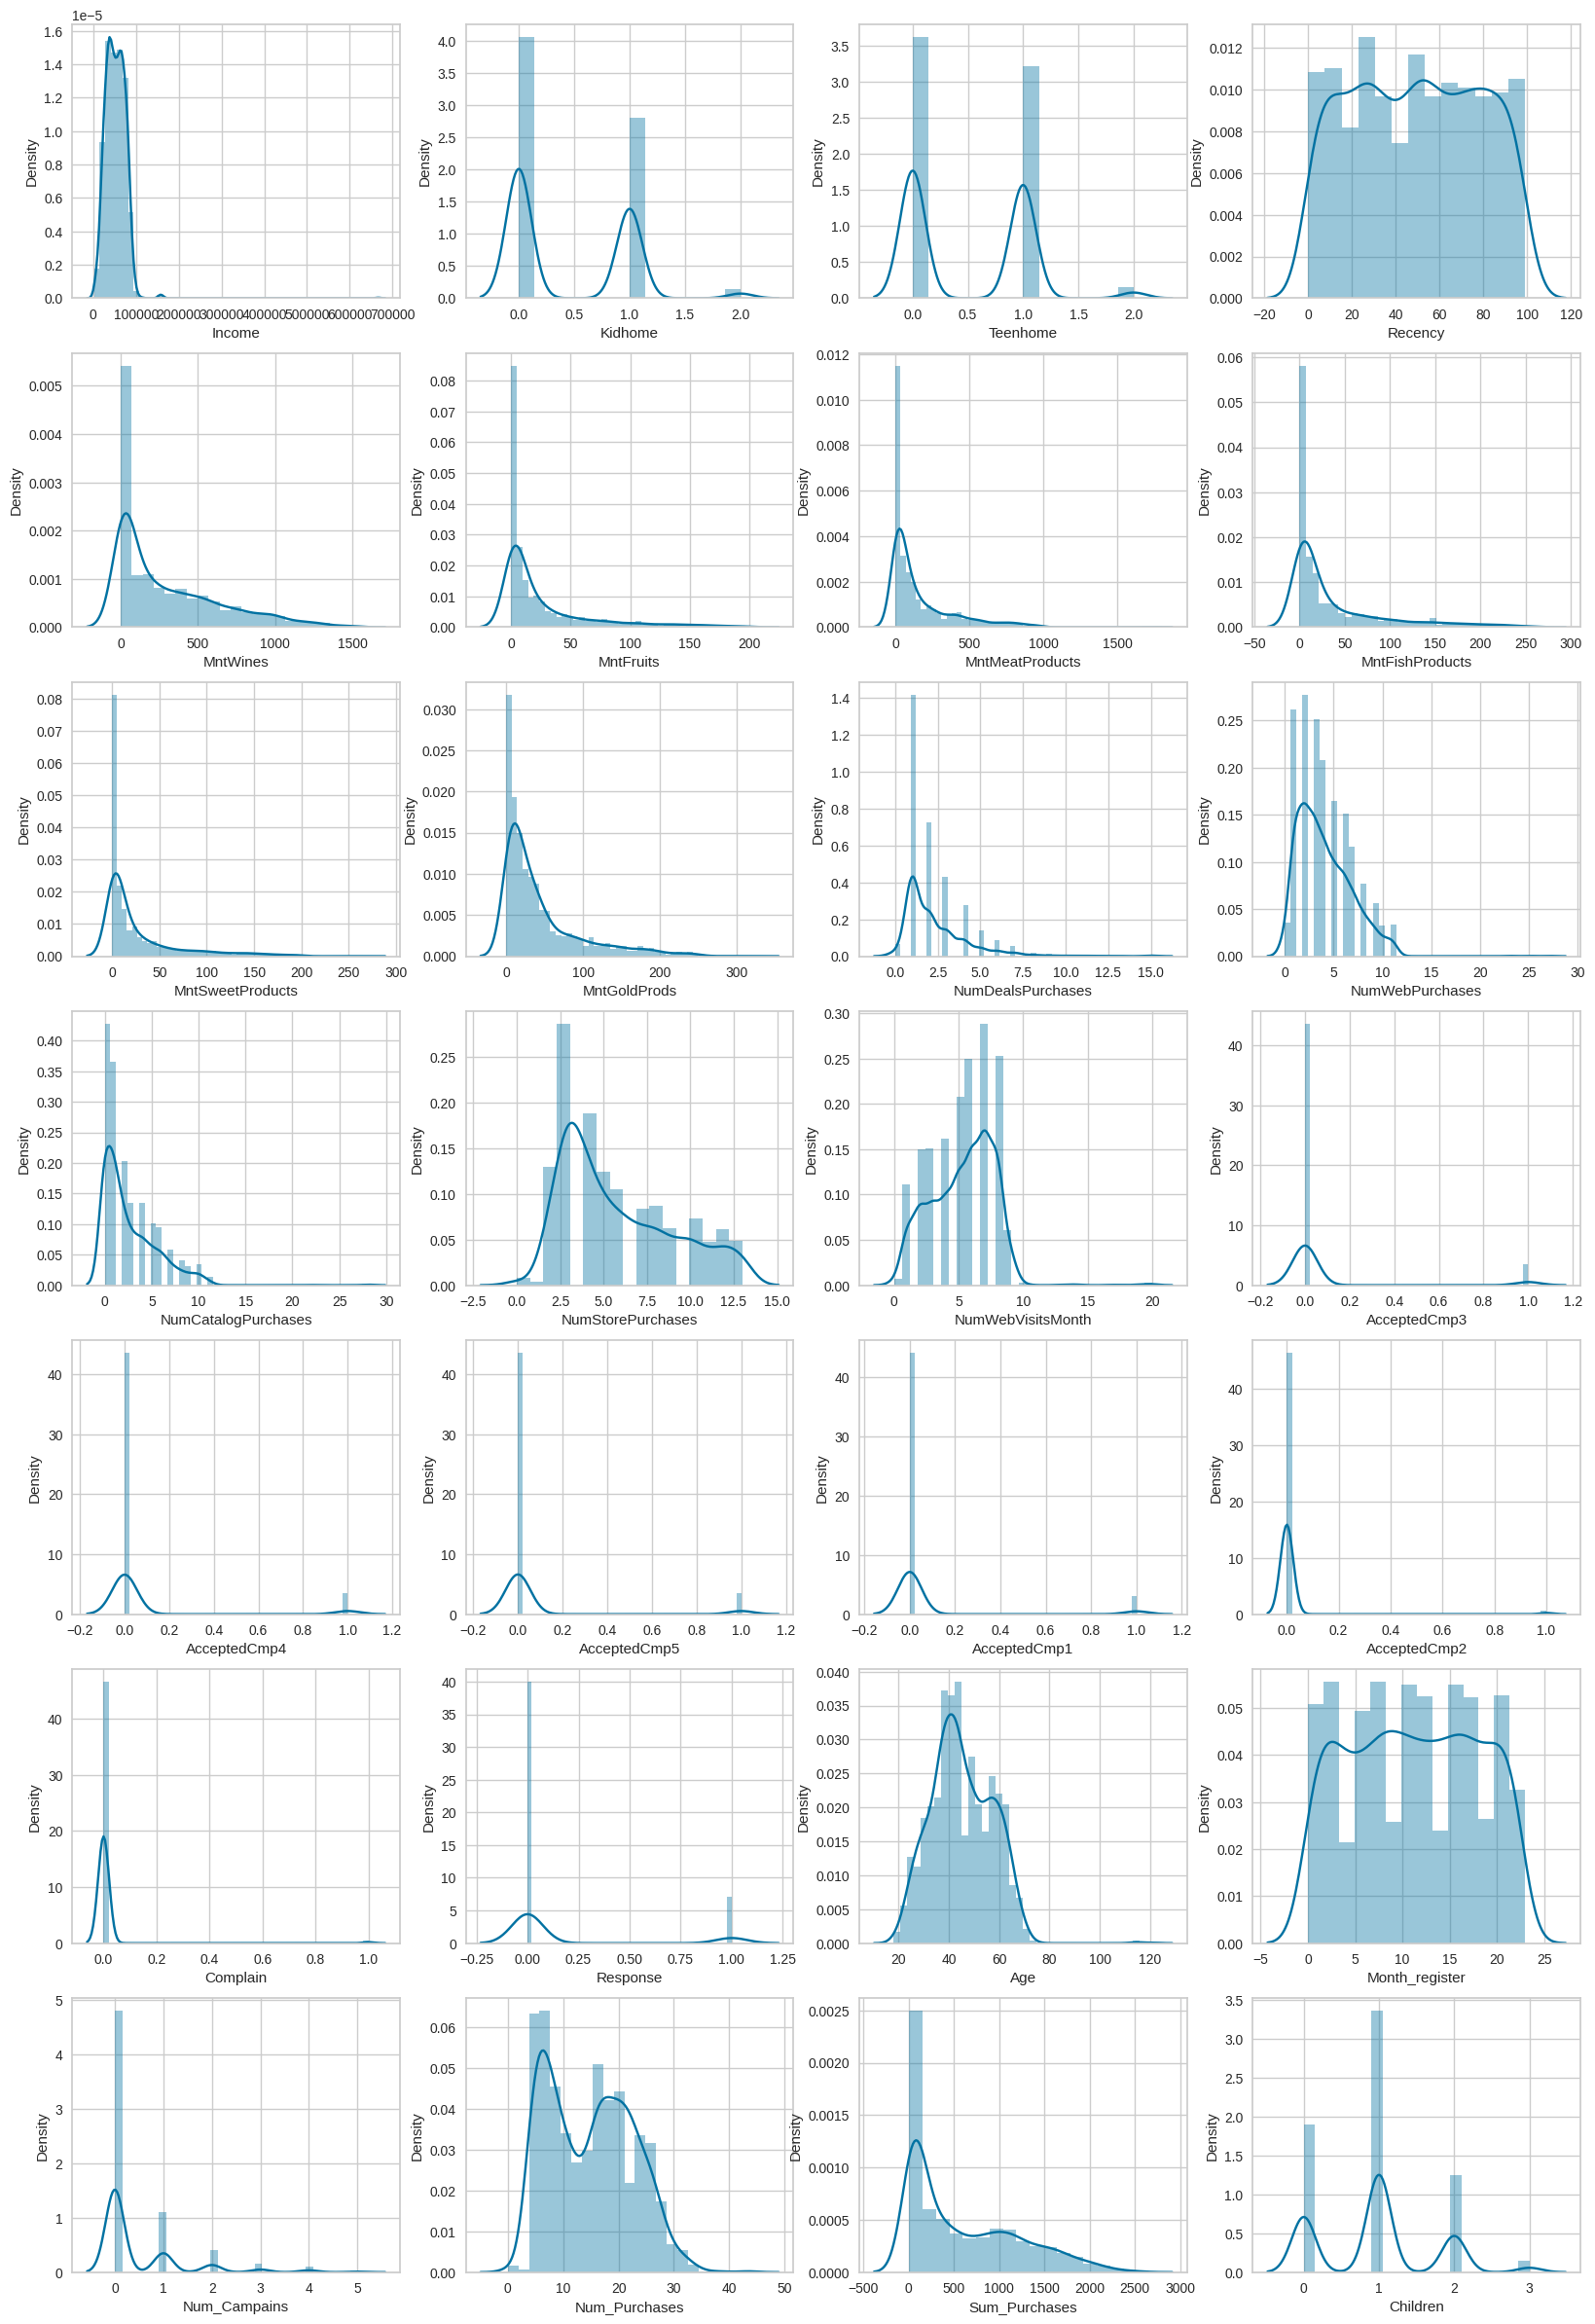

In [27]:
# Графики плотности распределения
fig = plt.figure(figsize = (20, 30))
for i, v in enumerate(num_col):
  axes = fig.add_subplot(7, 4, i+1)
  sns.distplot(df[v], ax=axes)

Видим, что большинство признаков имеют длинные тонкие хвосты, что свидетельствует о значительном количестве выбросов. Построим диаграммы `boxplot`

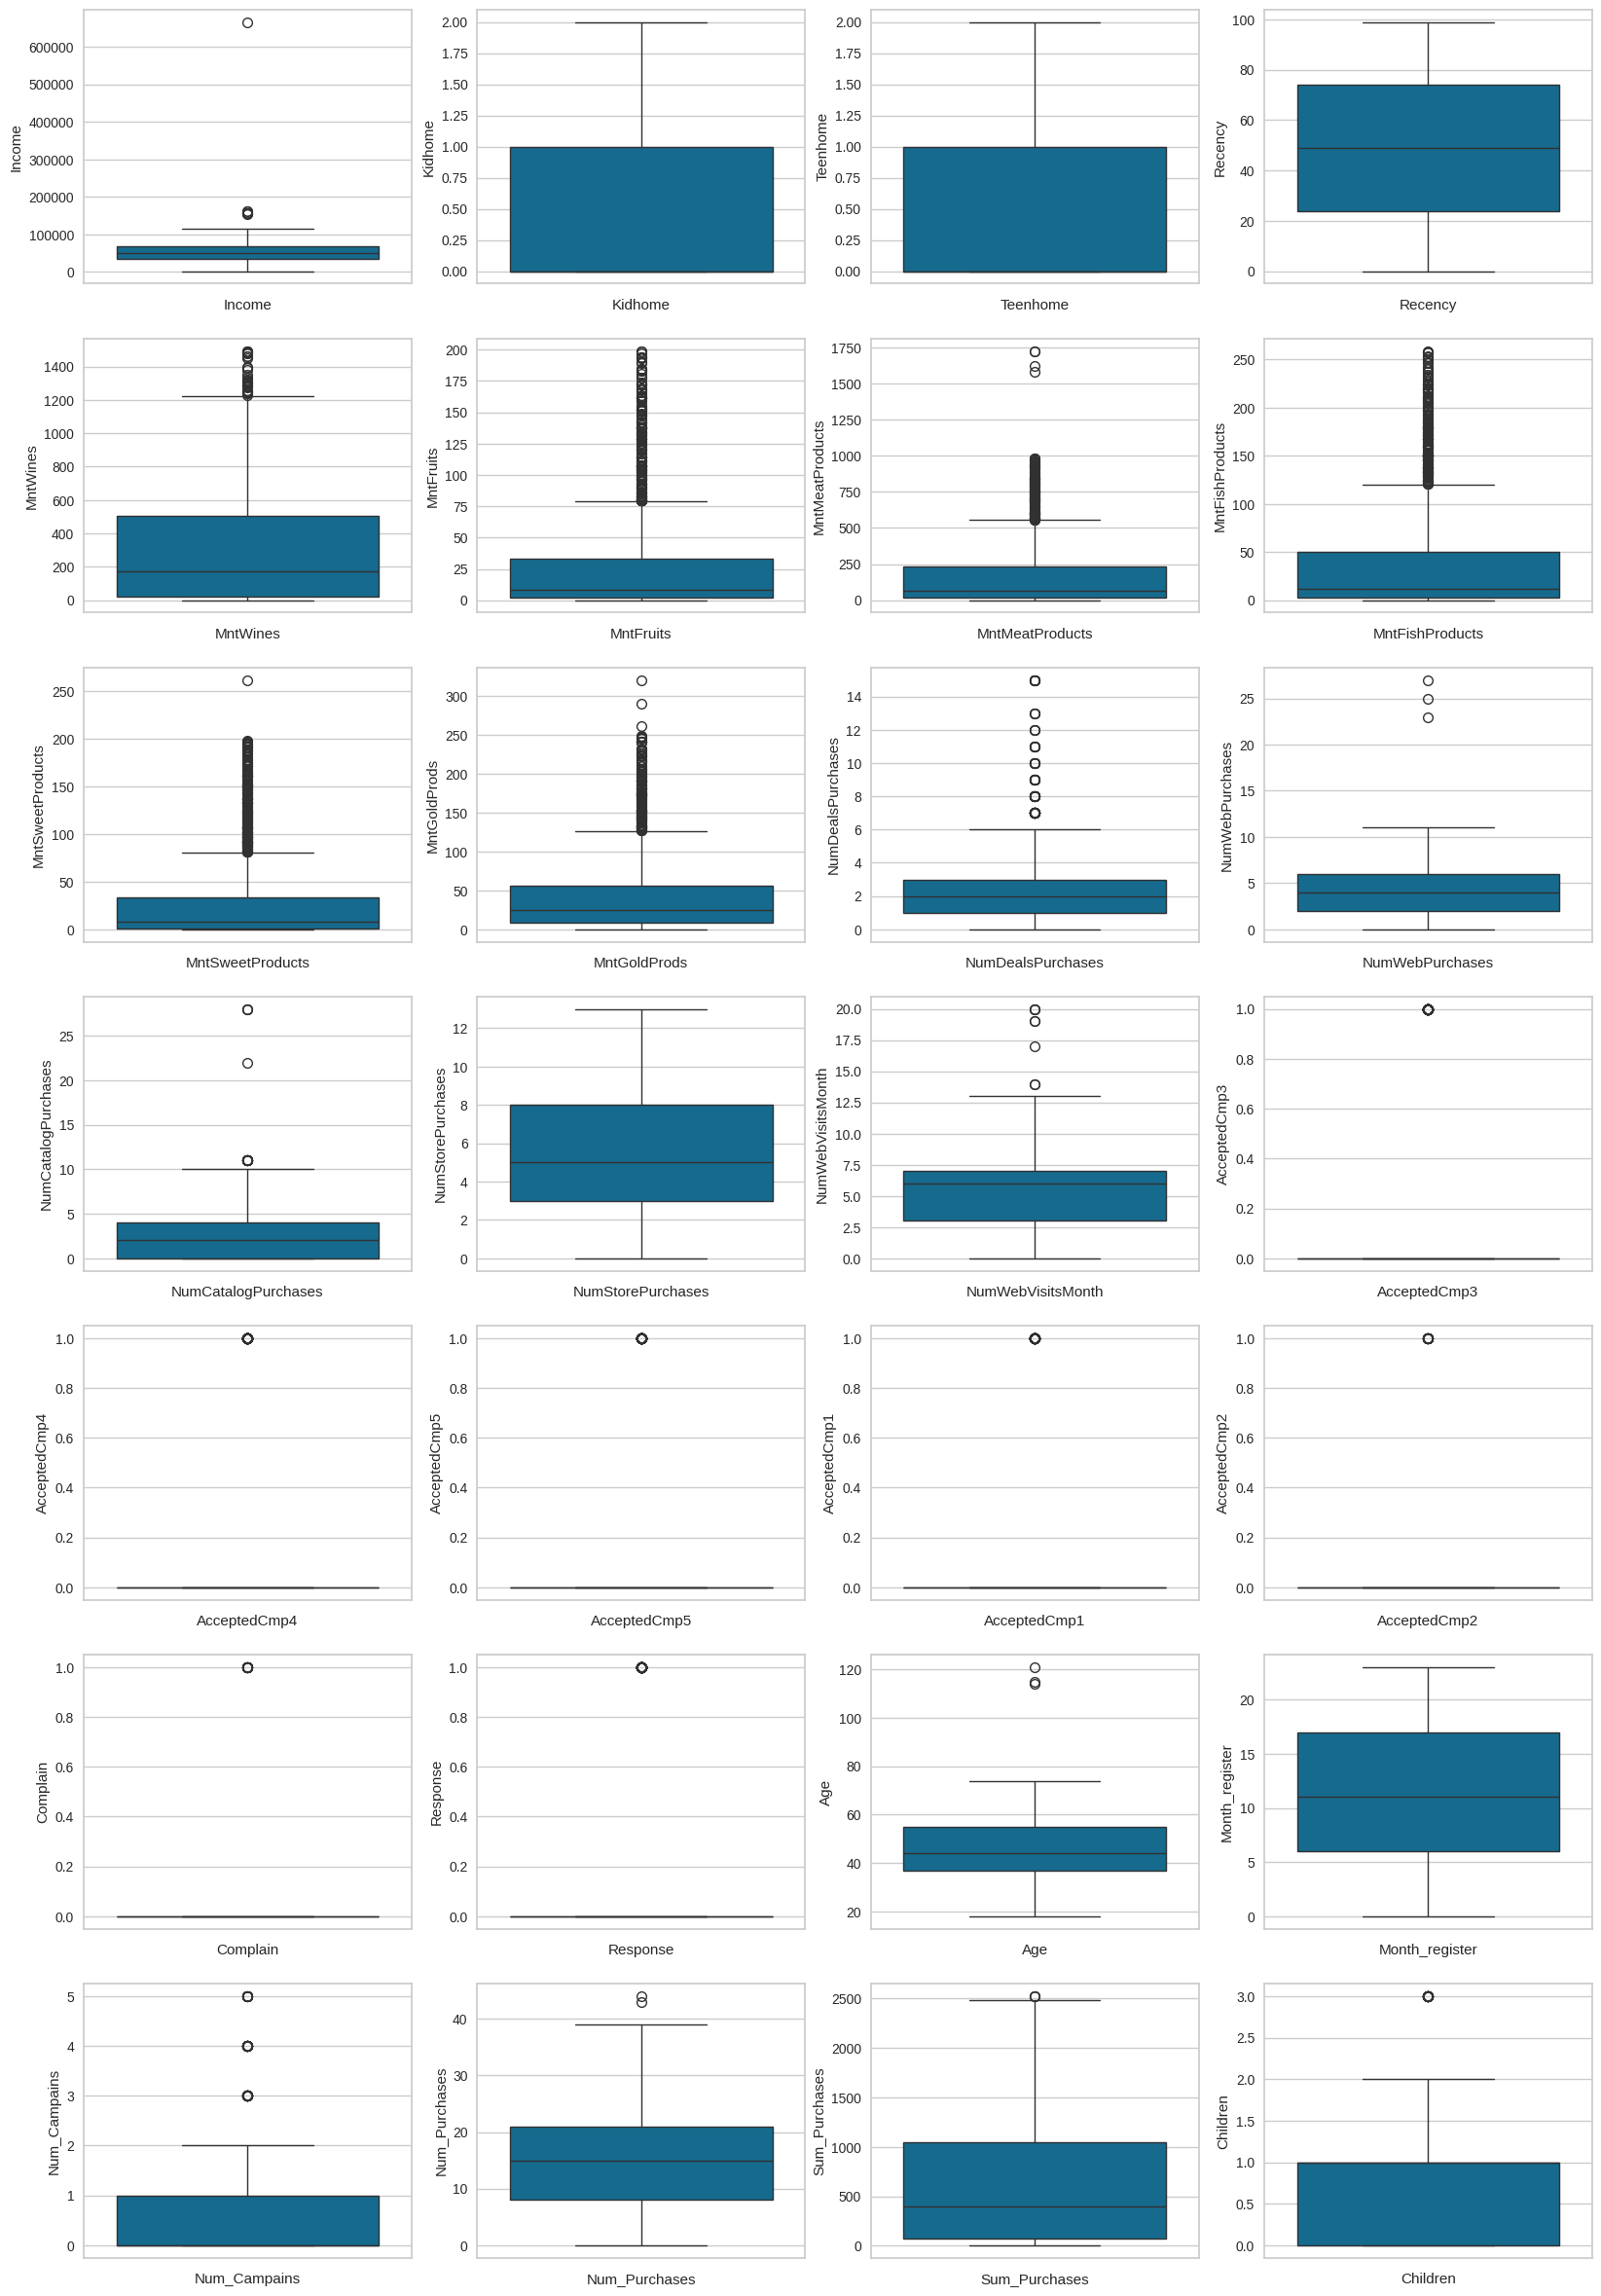

In [28]:
# диаграммы размаха
fig = plt.figure(figsize = (20, 30))
for i, v in enumerate(num_col):
  axes = fig.add_subplot(7, 4, i+1)
  sns.boxplot(df[v], ax=axes)

  plt.xlabel(v)
plt.show()

Мы наблюдаем здесь много выбросов. Их количество весьма значительно по каждому из признаков, характеризующих суммы покупок различных категорий товаров, приобретаемых клиентами. Поэтому эти данные корретировать не будем, чтобы не исключать из рассмотрения клиентов с большими покупками.

Удалим аномальные значения в столбцах `Age`и `Income`. Будем руководствоваться интервалом длиной 1.5 межквартильных размаха от первого и третьего квартилей.


In [29]:
def remove_outliers(data, column):
    Q1, Q3 = np.percentile(data[column], [25, 75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    data = data[(data[column] > lower_bound) & (data[column] < upper_bound)]

    return data

In [30]:
df=remove_outliers(df, 'Age')
df=remove_outliers(df, 'Income')

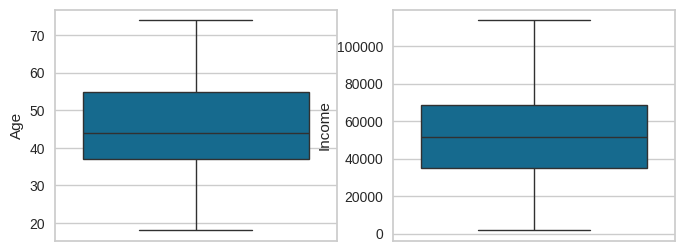

In [31]:
# Посторим графики плотностей распределения вероятностей после корректировки
fig = plt.figure(figsize = (8, 3))
for i, v in enumerate(['Age', 'Income']):
  axes = fig.add_subplot(1, 2, i+1)
  sns.boxplot(df[v], ax=axes)

Изучим корреляционные связи между признаками.

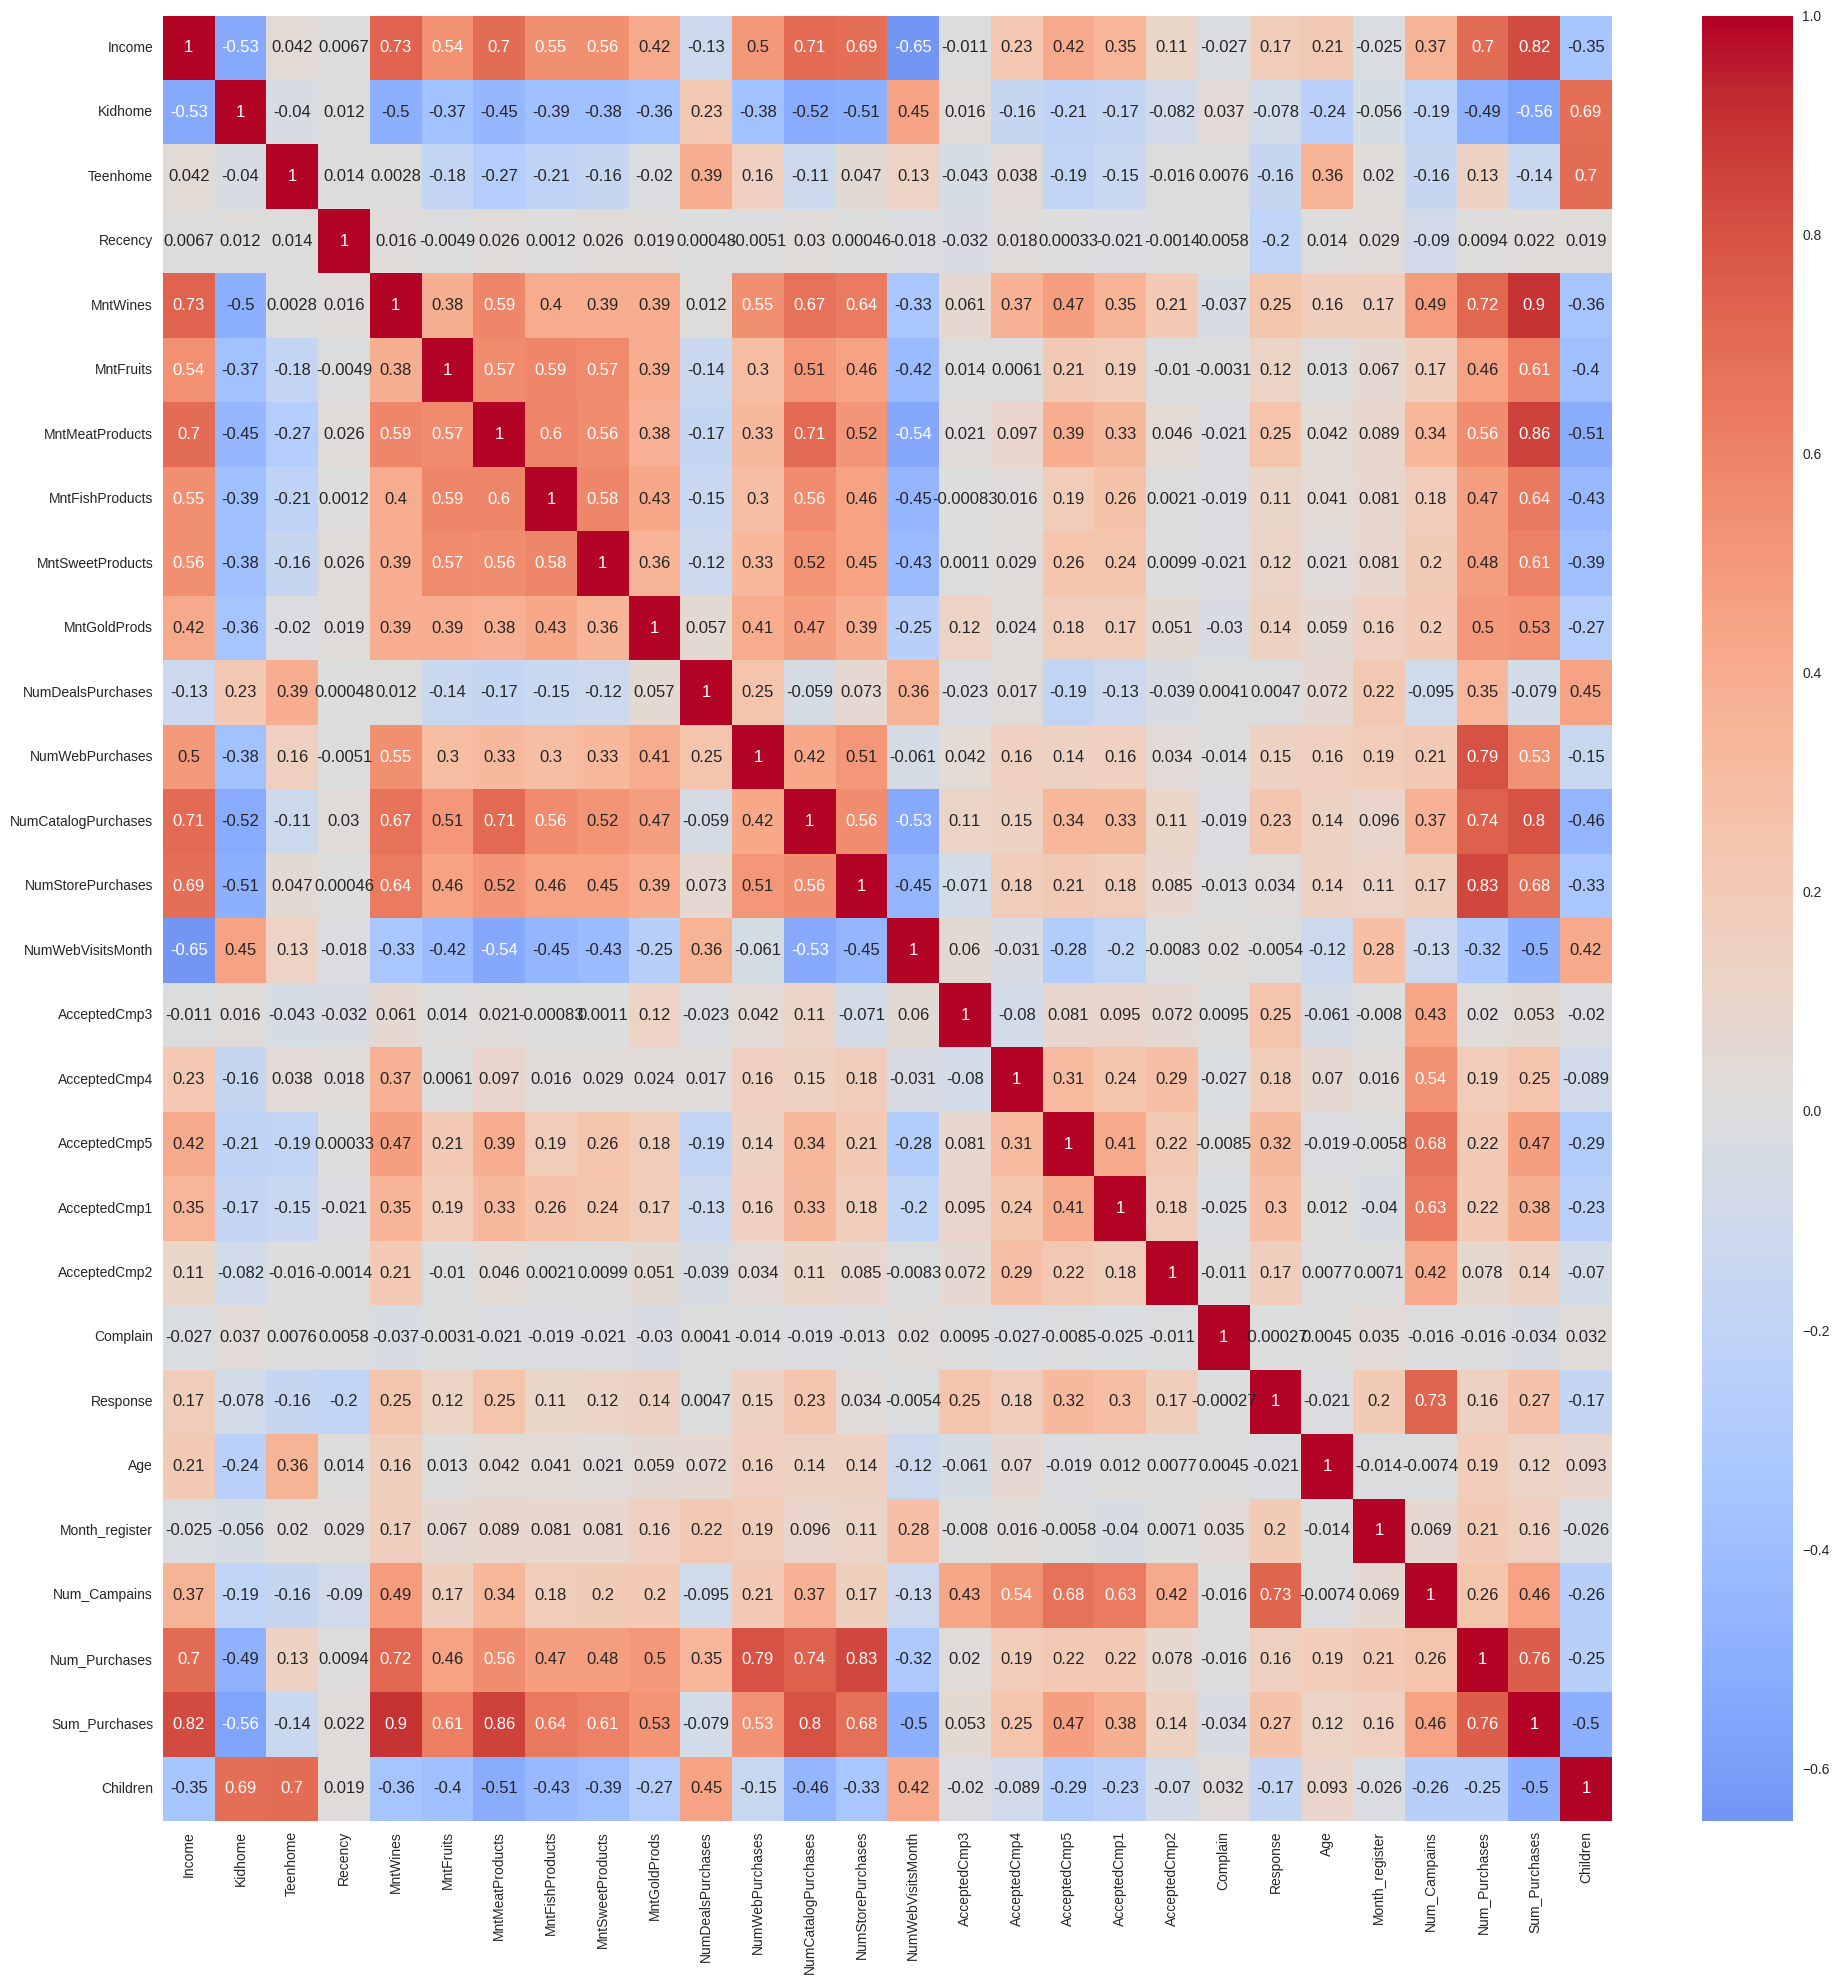

In [32]:
plt.figure(figsize = (20,20))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

plt.tight_layout()

Можем наблюдать тесные линейные связи между суммой покупок различных категорий товаров и способом приобретения этих товаров

##  Моделирование и визуализация данных

In [33]:
# Сделаем копию датафрейма на случай, если придется вносить изменения
df_copy = df.copy()

Т.к. среди признаков имеются категориальные, введем фиктивные переменные методом  `get_dummies`

In [34]:
df=pd.get_dummies(df, drop_first=True).astype('int')

Стандартизуем данные с помощью `StandardScaler()`

In [35]:
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0   58138        0         0       58       635         88              546   
1   46344        1         1       38        11          1                6   
2   71613        0         0       26       426         49              127   
3   26646        1         0       26        11          4               20   
4   58293        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  Month_register  \
0              172                88            88  ...              21   
1                2                 1             6  ...               3   
2              111                21            42  ...              10   
3               10                 3             5  ...               4   
4               46                27            15  ...               5   

   Num_Campains  Num_Purchases  Sum_Purchases  Children  Education_Basic  \
0             1             25           1617         0                0   
1             0              6             27         2                0   
2             0             21            776         0                0   
3             0              8             53         1                0   
4             0             19            422         1                0   

   Education_Graduation  Education_Master  Education_PhD  \
0                     1                 0              0   
1                     1                 0              0   
2                     1                 0              0   
3                     1                 0              0   
4                     0                 0              1   

   Marital_Status_Single  
0                      1  
1                      1  
2                      0  
3                      0  
4                      0  

[5 rows x 33 columns]

In [36]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled=pd.DataFrame(df_scaled, columns=df.columns)

### PCA

**PCA (Principal Component Analysis)** - метод главных компонент, находит только линейные комбинации исходных признаков. Метод заключается в приближении матрицы признаков матрицей меньшего ранга, так называемое низкоранговое приближение. PCA находит множество новых измерений, которые ортогональны (таким образом линейно независимы) и отранжированы по величине дисперсии, которую они объясняют. Это значит, что более значимые principal оси будут первыми (более значимые = больше дисперсия/больше разброс в данных).


Определим, какое количество компонент необходимо для сохранения 90% информации данных

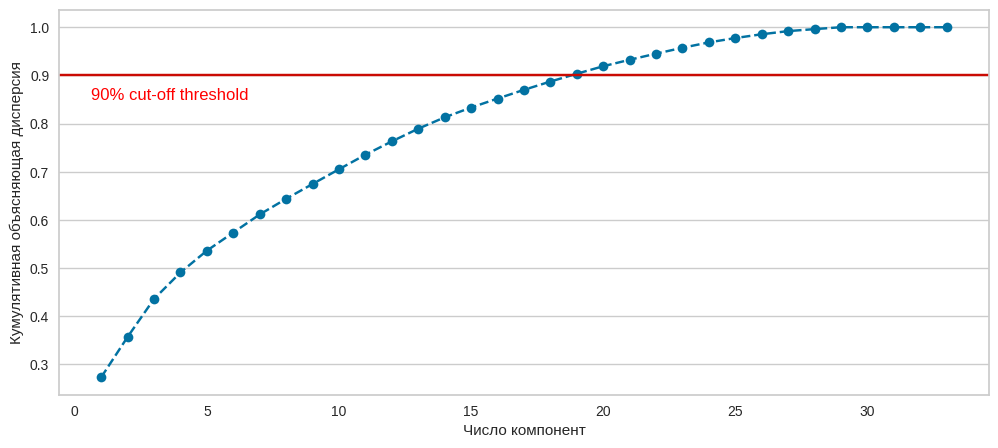

In [37]:

pca = PCA().fit(df_scaled)

plt.figure(figsize=(12, 5))
x = np.arange(1, len(pca.explained_variance_ratio_)+1, 1)
plt.plot(x, np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.text(0.6, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.grid(axis='x')

plt.xlabel('Число компонент')
plt.ylabel('Кумулятивная объясняющая дисперсия');

Видим, что для сохранения 90% информации необходимо не менее 20 компонент. Изобразим диаграммы рассеяния для определения структуры данных и визуальной оценки числа кластеров.

In [38]:
pca =PCA(n_components=15).fit(df_scaled)


components = pca.fit_transform(df_scaled)
total_var = pca.explained_variance_ratio_.sum() * 100
n_components = len(pca.explained_variance_ratio_)

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    dimensions=range(n_components),
    labels=labels,
    title=f'Общая объясненная дисперсия: {total_var:.2f}%',
)
fig.update_traces(marker_size=1, diagonal_visible = True)

fig.update_layout(
    font=dict(size=8, color='black'),
    autosize=False,
    width=1200,
    height=1000,
)
fig.show()

В проекциях большинства пар компонент видим 2 - 3  кластера

In [39]:
pca = PCA(n_components=0.9, random_state=12345)
X_embedding_pca = pca.fit_transform(df_scaled)


fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

### T-SNE

**T-SNE (t-распределенное стохастическое вложение соседей)** - вероятностный метод. T-SNE сводит к минимуму расхождение между двумя распределениями: распределением, которое измеряет попарное сходство входных объектов, и распределением, которое измеряет попарное сходство соответствующих точек с низкой размерностью во вложении.

Ограничения для использования этого метода.
- Для очень больших размерных данных, возможно, потребуется применить другой метод уменьшения размерности перед использованием t-SNE - PCA для плотных данных
- TruncatedSVD для разреженных данных

In [40]:
tsne = TSNE(n_components=3, random_state=12345)

X_embedding_tsne = tsne.fit_transform(df)

fig = px.scatter_3d(
    X_embedding_tsne, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

### UMAP

**UMAP (Uniform Manifold Approximation and Projection)** - как и `T-SNE` нелинейный метод. При снижении размерности `UMAP` сначала выполняет построение взвешенного графа, соединяя ребрами только те объекты, которые являются ближайшими соседями. Множество из ребер графа — это нечёткое множество с функцией принадлежности, она определяется как вероятность существования ребра между двумя вершинами. Затем алгоритм создает граф в низкоразмерном пространстве и приближает его к исходному, минимизируя сумму дивергенций Кульбака-Лейблера для каждого ребра из множеств.

In [41]:
umap = UMAP.UMAP(n_components=3, random_state=12345, n_neighbors=15)
X_embedding_umap = umap.fit_transform(df_scaled)

fig = px.scatter_3d(
    X_embedding_umap, x=0, y=1, z=2,
    labels={'color': 'species'}
)
fig.update_traces(marker_size=2)
fig.show()

## Моделирование и визуализация результатов

### K-means и поиск оптимального числа кластеров методом локтя

Основан на подборе числа кластеров относительно расстояния до центров кластеров, которые были выбраны изначально случайным образом. По умолчанию используется k-means++, который в начале инициализирует первый центроид как random, далее следующий центроид ищет более оптимальным путем при помощи вычисления квадрата расстояния до ближайшего центроида для каждой точки.

https://towardsdatascience.com/understanding-k-means-k-means-and-k-medoids-clustering-algorithms-ad9c9fbf47ca

Инициируем класс моделей KMeans, проведем обучение модели при различном числе кластеров и построим график изменения межкластерного расстояния в зависимости от числа кластеров

In [ ]:
interclusterdistance = []

for clusters in range(1,15):
    km = KMeans(n_clusters = clusters, init ='k-means++', max_iter=300,random_state=12345)
    km.fit(df_scaled)
    interclusterdistance.append(km.inertia_)

#plotting the values
plt.figure(figsize=(10,6))
plt.plot(range(1, 15), interclusterdistance, marker='o', color='b')
plt.xlabel('Количество кластеров')
plt.ylabel('Межкластерное расстояние')
plt.grid(True)
plt.show()

Видим, что межкластерное расстояние уменьшается достаточно медленно. Можем наблюдать, что при k от 2 до 6 межкластерное расстояние значительно уменьшается.

Проверим, верно ли выбрано число кластеров. Построим график изменения межкластерного расстояния с использованием автоматического визуализатора `KElbowVisualizer`

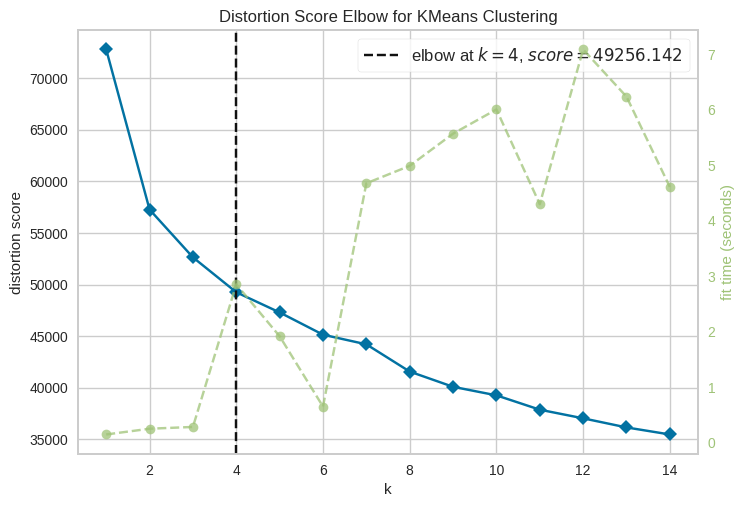

In [ ]:
visual_elbow = KElbowVisualizer(KMeans(init='k-means++',max_iter=300,random_state=123456), k=(1,15)).fit(df_scaled)


visual_elbow.poof()
plt.show()

Оптимальное число кластеров равно 4. Проведем разбиение данных на 4 кластера и вычислим метрику силуэта.

- **Силуэтный коэффициент (silhouette score)** - Чем выше значение данной метрики, тем больше вероятность, что объекты довольно хорошо сгруппированы в кластеры. Оценивает расстояние как между объектами внутри кластера, так и между объектами соседних кластеров.

https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient



In [ ]:
kmeans_model = KMeans(n_clusters=4,init='k-means++',max_iter=300,random_state=12345).fit(df_scaled)

#Добавим метки кластеров всем объектам с помощью атрибута labels_
labels_km = kmeans_model.labels_

# Вычислим коэффициент силуэта
silhouette_score_km = silhouette_score(df_scaled,labels_km)
print('коэффициент силуэта равен', silhouette_score_km)

коэффициент силуэта равен 0.155334502568902


In [ ]:
# Функция для изображения графика силуэтного скора
def silhouette_plot(
    data: pd.DataFrame, labels: np.array, metric="euclidean", ax: plt.Axes = None
) -> None:
    """
    Функция вывода графика силуэтного скора
    :param data: данные
    :param labels: метки кластеров
    :param metric: метрика
    :return: None
    """
    if ax is None:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(7, 5)

    silhouette_values = silhouette_samples(data, labels, metric=metric)
    y_lower, y_upper = 0, 0

    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_values[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax.barh(
            range(y_lower, y_upper), cluster_silhouette_vals, edgecolor="none", height=1
        )
        ax.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Получение средней оценки силуэтного скора и построение графика
    avg_score = float(np.mean(silhouette_values))
    ax.axvline(avg_score, linestyle="--", linewidth=1, color="red")
    ax.set_xlabel(f"Silhouette  = {round(avg_score, 2)}")
    ax.set_ylabel("Метки кластеров")
    ax.set_title("График силуэта для различных кластеров", y=1.02)

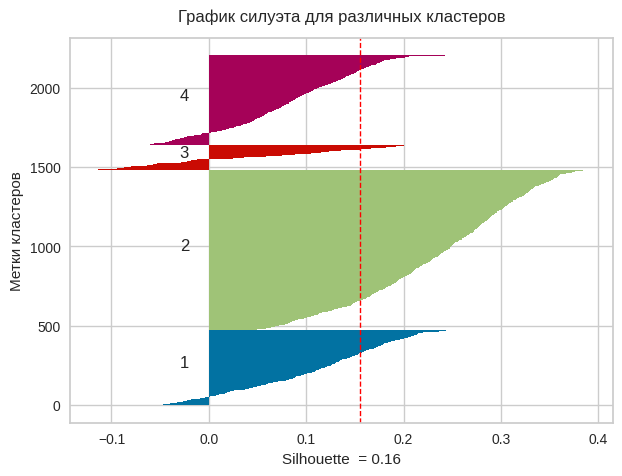

In [ ]:
# график силуэтного скора
silhouette_plot(df_scaled,labels_km )

Видим, что разбиение клиентов на 4 кластера не является оптимальным. Один кластер очень маленький и почти половина его объектов ближе к объектам соседнего кластера. Поэтому применим ещё раз алгоритм `KMeans` для 3 кластеров.

Вычислим центры кластеров с помощью атрибута `cluster_centers_`

In [ ]:
kmeans_model.cluster_centers_

array([[ 1.01431130e+00, -7.44832885e-01, -5.16002122e-01,
         6.98505496e-02,  6.44702230e-01,  1.11766083e+00,
         1.16330044e+00,  1.17360595e+00,  1.07094118e+00,
         6.28040188e-01, -4.73148948e-01,  4.23418650e-01,
         1.06171165e+00,  8.38802829e-01, -9.84230369e-01,
        -9.70767967e-02, -1.86978801e-01,  3.16644119e-03,
         1.26758885e-02, -1.17444044e-01, -6.66077672e-03,
        -5.05741278e-02,  1.14946582e-01, -1.90731406e-03,
        -1.14377481e-01,  7.82276382e-01,  1.09075554e+00,
        -9.08898265e-01, -1.44794932e-01,  1.29722580e-01,
        -8.66472331e-02, -5.29382112e-02,  3.38651581e-02],
       [-8.37737927e-01,  6.34581271e-01, -1.18609785e-01,
         7.29284409e-03, -7.90103987e-01, -5.39246146e-01,
        -6.56091407e-01, -5.52065609e-01, -5.35233582e-01,
        -5.51880778e-01, -1.72513412e-01, -7.42580226e-01,
        -7.50624758e-01, -8.08504106e-01,  4.60017092e-01,
        -2.22806132e-03, -2.53247759e-01, -2.80654812e-

Добавим метки кластров в датасет

In [ ]:
df_copy['labels_km']=labels_km

Определим количество клиентов в каждом кластере методом `value_counts()`

In [ ]:
df_copy['labels_km'].value_counts()

labels_km
1    1009
3     568
0     474
2     154
Name: count, dtype: int64

Здесь мы наблюдаем один достаточно многочисленный кластер и два небольшого размера.

Визуализируем результаты кластеризации

In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = df_copy['labels_km']
)
fig.update_traces(marker_size=2)
fig.show()

### Агломеративная кластеризация и поиск оптимального числа кластеров с построением дендрограммы

Входит в семейство иеархических методов кластеризации. В самом начале каждый объект - это по сути кластер, далее происходит последовательное "слияние" кластеров и объединение их в группу (похоже в итоге на древовидную структуру). Кол-во кластеров получается путем отсечения дерева по заданному расстоянию. По умолчанию сводит к минимуму дисперсию объединяемых кластеров (linkage).

Выполним кластеризацию и построим дендрограмму для определения оптимального числа кластеров

* `method=’single’` - ближайшего соседа;
* `method='complete'` - дальнего соседа;
* `method=’average’` - среднее расстояние;
* `method=’weighted’` - среднее взвешенное;
* `method=’centroid’`
* `method=’median’`
* `method=’ward’`

In [ ]:
# Проведем иерархическую кластеризацию, расстояния будем считать методом Варда
linkage_df = linkage(df_scaled, method = 'ward')

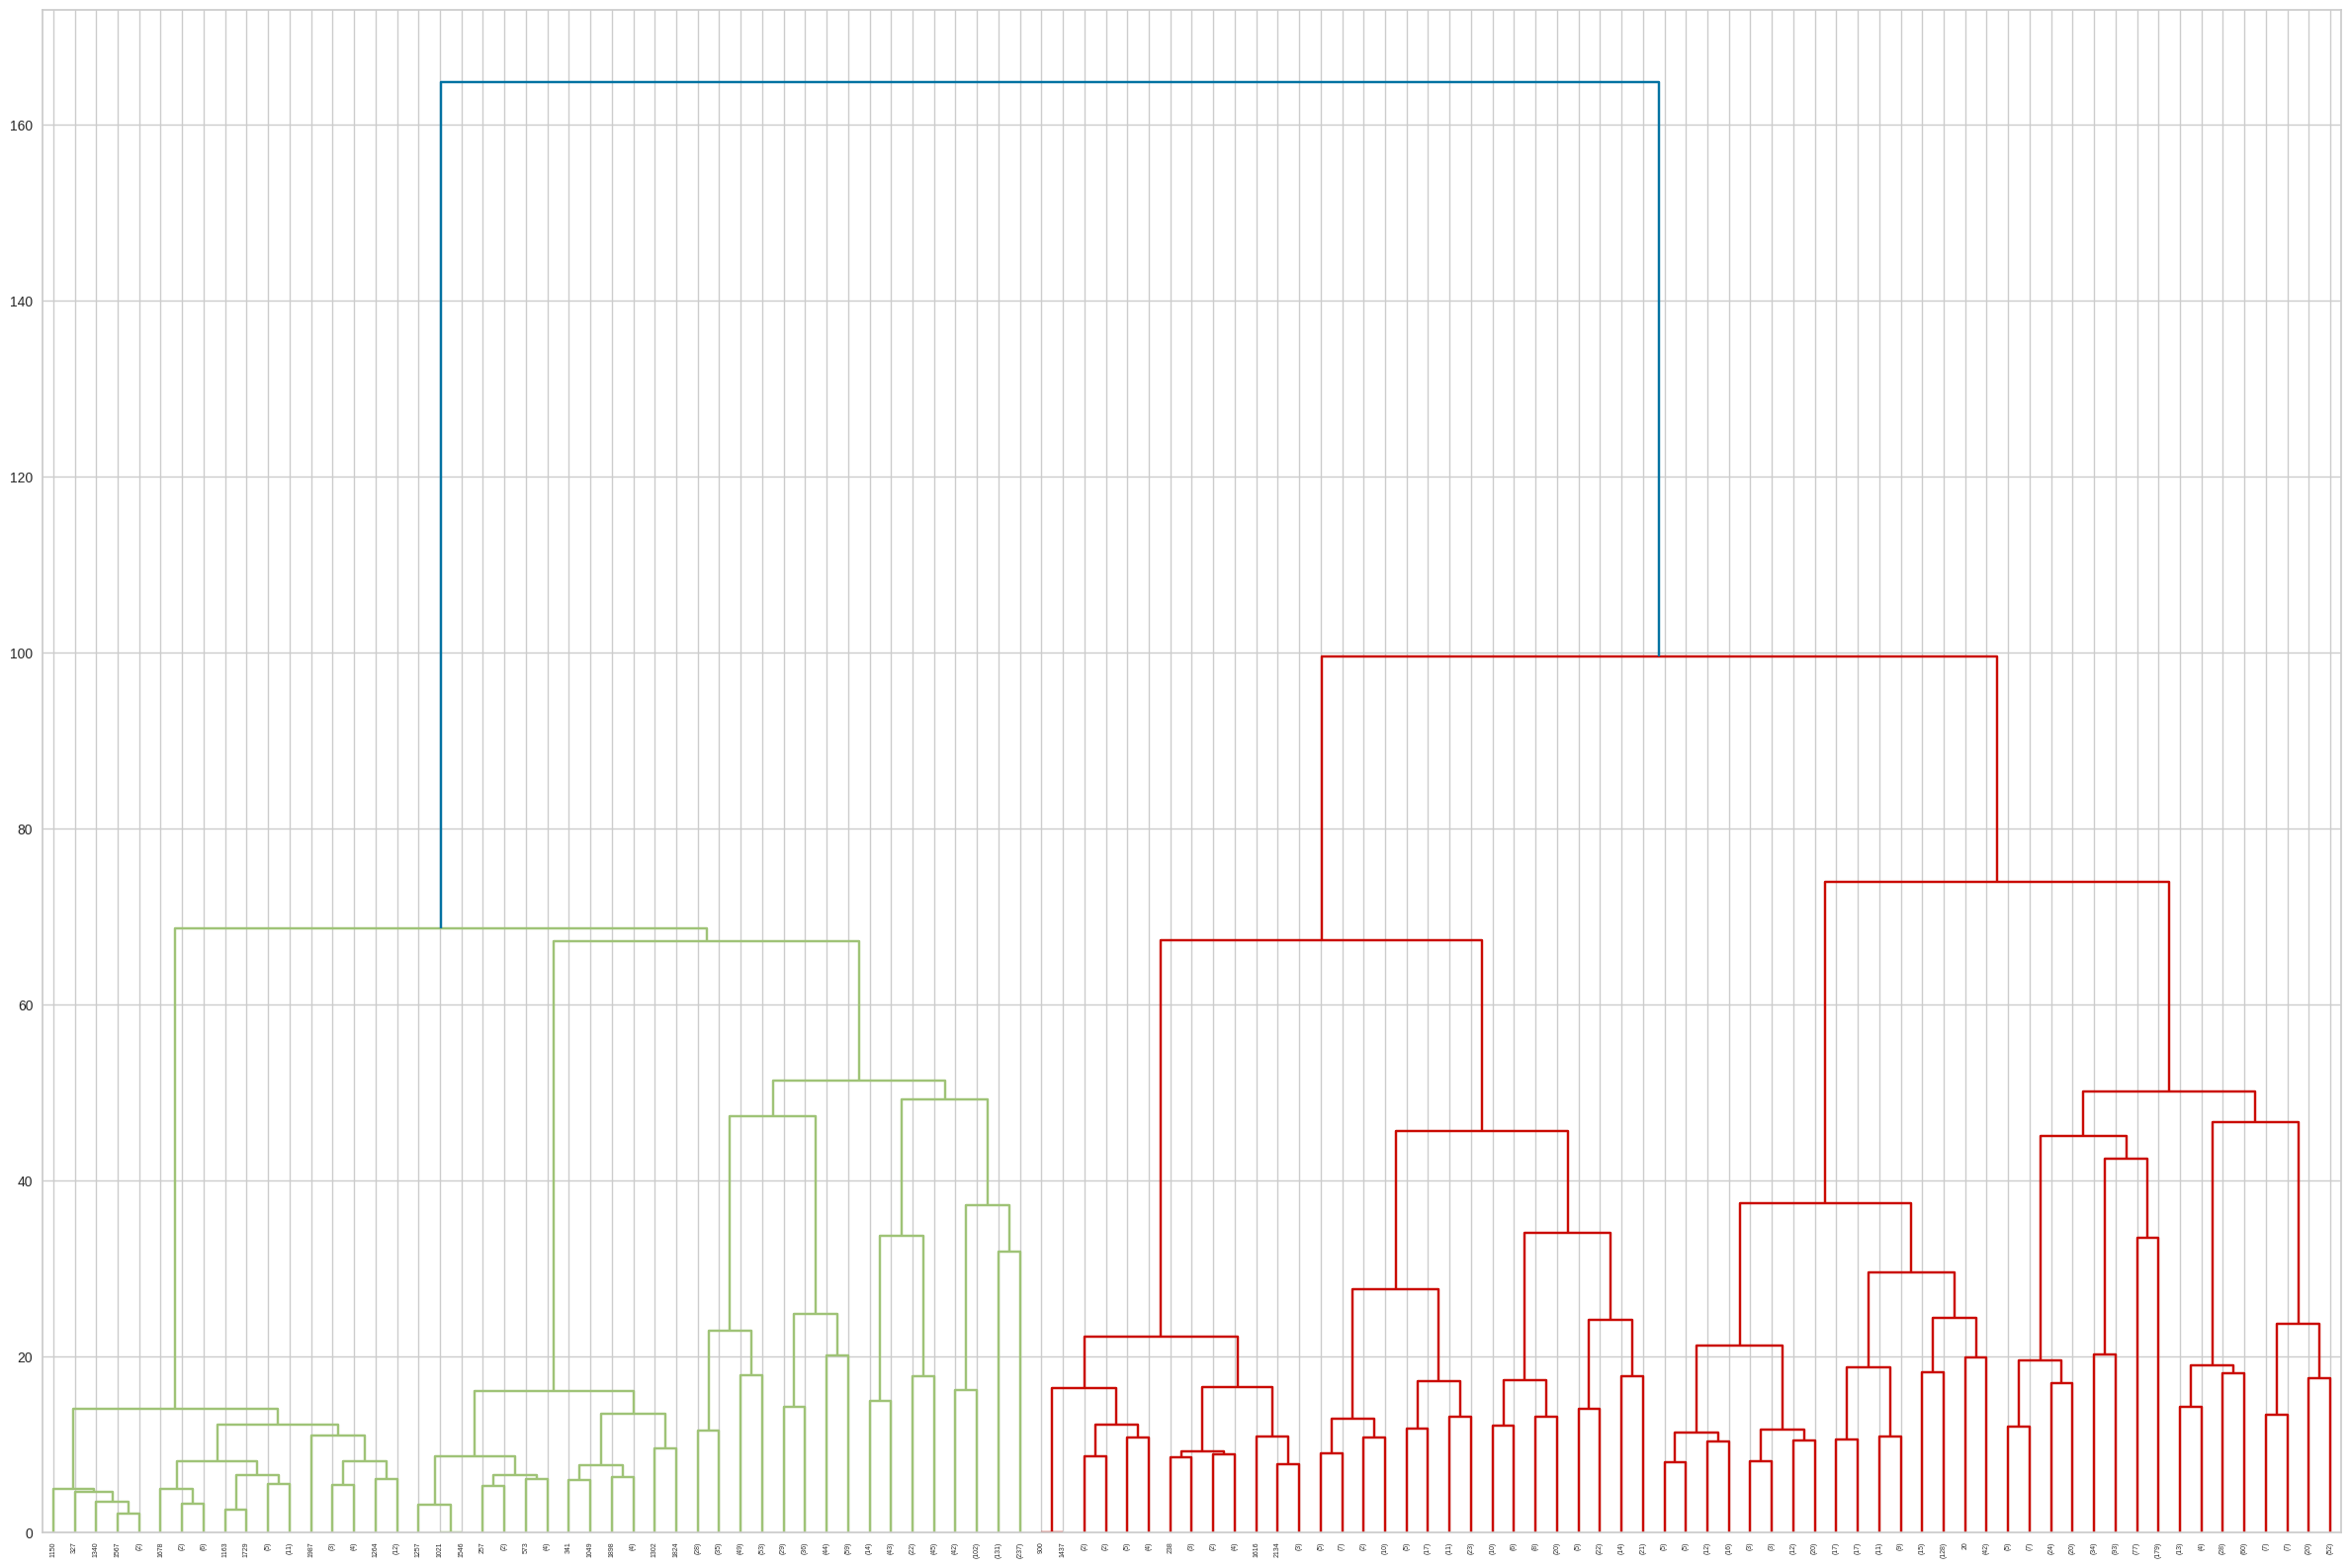

In [ ]:
# Изобразим результаты в виде дендрограммы
plt.figure(figsize = (30, 20))
dendrogram(linkage_df, p=6,truncate_mode='level', leaf_rotation=90)

plt.show()

Визуально оптимальное число кластеров согласно этому алгоритму 3.

In [ ]:
aggl_model = AgglomerativeClustering(n_clusters=3).fit(df_scaled)

# Сформируем метки кластеров
labels_aggl =aggl_model.labels_

# Вычислим коэффициент силуэта
silhouette_score_aggl =silhouette_score(df_scaled,labels_aggl)
print('коэффициент силуэта равен', silhouette_score_aggl)

коэффициент силуэта равен 0.16960212760561144


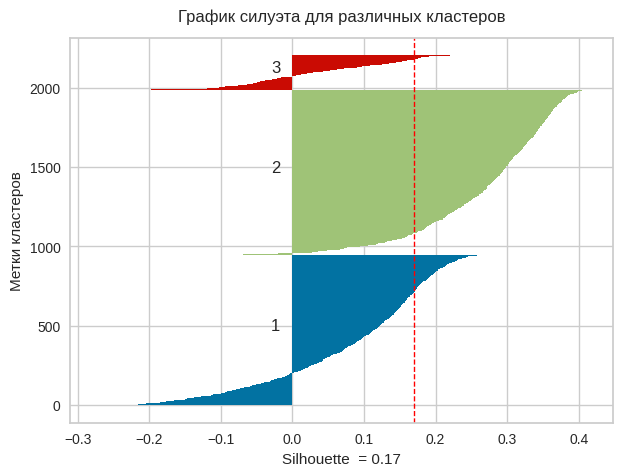

In [ ]:
# график силуэтного скора
silhouette_plot(df_scaled,labels_aggl)

In [ ]:
# Добавим метки кластеров в датасет и определим количество объектов, попавших в каждый кластер
df_copy['labels_aggl'] = labels_aggl

Здесь кластеры имеют достаточно непохожие значения с методом `K-Means` по числу клиентов. Один кластер существенно меньше двух остальных.

Визуализируем результаты

In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = df_copy['labels_aggl']
)
fig.update_traces(marker_size=2)
fig.show()

### BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)

BIRCH — сокращение от «Сбалансированное итеративное сокращение и кластеризация с использованием иерархий» включает в себя построение древовидной структуры, из которой извлекаются центроиды кластера.

Радиус подкластера, полученного путем слияния новой выборки и ближайшего подкластера, должен быть меньше порогового значения. В противном случае запускается новый подкластер. Установка этого значения на очень низкое способствует разделению и наоборот

In [ ]:
birch_model = Birch(n_clusters=3,threshold=0.05, branching_factor=60).fit(df_scaled)

labels_birch =birch_model.labels_
silhouette_score_birch =silhouette_score(df_scaled,labels_birch)
print('коэффициент силуэта равен', silhouette_score_birch)

коэффициент силуэта равен 0.17451005106817707


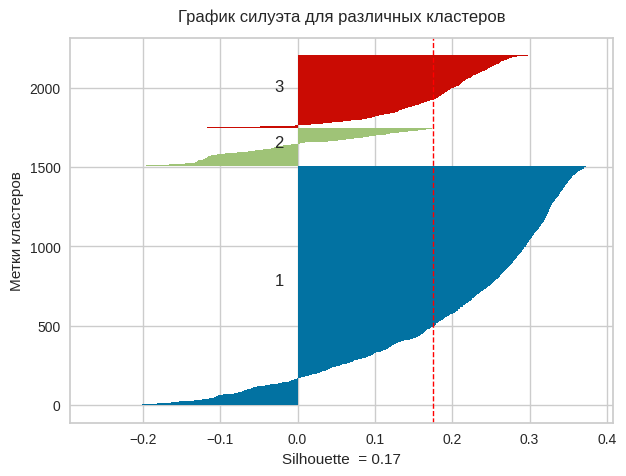

In [ ]:
# график силуэтного скора
silhouette_plot(df_scaled, labels_birch)

In [ ]:
# Добавим метки классов в датасет
df_copy['labels_birch'] =labels_birch

In [ ]:
# Визуализируем результаты

fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = df_copy['labels_birch']

)
fig.update_traces(marker_size=2)
fig.show()

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN - сокращение от «Пространственная кластеризация приложений с шумом на основе плотности» включает в себя поиск областей с высокой плотностью в домене и расширение этих областей пространства объектов вокруг них в виде кластеров

In [ ]:
dbscan_model = DBSCAN(eps=1.5, min_samples=5).fit(df_scaled)


labels_dbscan =dbscan_model.labels_
silhouette_score_dbscan =silhouette_score(df_scaled,labels_dbscan)
print('коэффициент силуэта равен', silhouette_score_dbscan)

коэффициент силуэта равен -0.21193075900041658


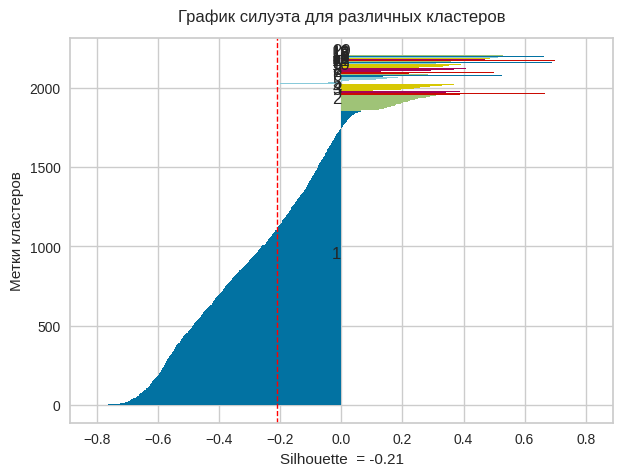

In [ ]:
# график силуэтного скора
silhouette_plot(df_scaled,labels_dbscan)

In [ ]:
# Метки кластеров
df_copy['labels_dbscan'] = dbscan_model

In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = df_copy['labels_dbscan']
)
fig.update_traces(marker_size=2)
fig.show()

### Spectral Clustering (Спектральная кластеризация)

На практике спектральная кластеризация очень полезна, когда структура отдельных кластеров сильно невыпуклая или, в более общем смысле, когда мера центра и разброса кластера не является подходящим описанием всего кластера, например, когда кластеры вложены.

При вызове `fit` матрица аффинности строится с использованием либо функции ядра, такой как гауссово (также известное как RBF) ядро ​​с евклидовым расстоянием или матрица связности k-ближайших соседей.

In [ ]:
spectral_model =SpectralClustering(n_clusters=3, affinity='nearest_neighbors',n_neighbors=11, random_state=12345,eigen_solver='arpack').fit(df_scaler)

labels_spectral = spectral_model.labels_
silhouette_score_spectral =silhouette_score(df_scaler,labels_spectral)
print('коэффициент силуэта равен', silhouette_score_spectral)

In [ ]:
# график силуэтного скора
silhouette_plot()

In [ ]:
# Метки
df_copy['labels_spectral'] =

In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = df_copy['labels_spectral']
)
fig.update_traces(marker_size=2)
fig.show()

## Affinity Propagation

Affinity Propagation (Распространение аффинности) – метод распространения близости получает на вход матрицу схожести между элементами датасета и возвращает набор меток, присвоенных этим элементам.

В отличие от K-средних, этот подход не требует предварительного задания количества кластеров. Основная идея здесь заключается в том, что мы хотели бы группировать наши данные на основе сходства наблюдений (или того, как они «соответствуют» друг другу).

Предпочтения для каждой точки `preference` – в качестве образцов с большей вероятностью будут выбраны точки с большими значениями предпочтений. На количество экземпляров, т.е. кластеров, влияет значение входных предпочтений. Если предпочтения не переданы в качестве аргументов, им будет присвоено медианное сходство входных данных.

Распространение сходства `preference` может быть интересным, поскольку оно выбирает количество кластеров на основе предоставленных данных. Для этой цели двумя важными параметрами являются предпочтение , которое контролирует количество используемых экземпляров, и коэффициент демпфирования , который подавляет сообщения об ответственности и доступности, чтобы избежать числовых колебаний при обновлении этих сообщений.

Коэффициент демпфирования `damping` — это степень, в которой текущее значение сохраняется относительно входящих значений (1 — демпфирование). Это для того, чтобы избежать числовых колебаний при обновлении этих значений (сообщений).




In [ ]:
affinity_model = sklearn.cluster.AffinityPropagation().fit()

labels_affinity =

silhouette_score_affinity =

print('коэффициент силуэта равен', silhouette_score_affinity )

In [ ]:
# график силуэтного скора
silhouette_plot()

In [ ]:
# Метки
df_copy['labels_affinity'] =

In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = df_copy['labels_affinity']
)
fig.update_traces(marker_size=2)
fig.show()

## PCA + Clustering

In [ ]:
pca_3 =
X_embedding_pca_3 =

### PCA + K-means

In [ ]:
pca_km = KMeans().fit()


In [ ]:
# Построим график силуэта для построенных кластеров
silhouette_plot()

In [ ]:
labels_pca_km =
silhouette_score_pca_km =
print('коэффициент силуэта равен', silhouette_score_pca_km)

df_copy['labels_pca_km'] =

In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = labels_pca_km
)
fig.update_traces(marker_size=2)
fig.show()

### PCA + Agglomerative Clustering

In [ ]:
pca_aggl = AgglomerativeClustering().fit()

In [ ]:
# График силуэта
silhouette_plot()

In [ ]:
labels_pca_aggl =
silhouette_score_pca_aggl =

print('коэффициент силуэта равен', silhouette_score_pca_aggl)
df_copy['labels_pca_aggl'] =


In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = labels_pca_aggl
)
fig.update_traces(marker_size=2)
fig.show()

### PCA + DBSCAN

In [ ]:
pca_dbscan = DBSCAN().fit()

In [ ]:
# График силуэта
silhouette_plot()

In [ ]:
labels_pca_dbscan =
silhouette_score_pca_dbscan =
print('коэффициент силуэта равен', silhouette_score_pca_dbscan)
df_copy['labels_pca_dbscan'] =

In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = labels_pca_dbscan
)
fig.update_traces(marker_size=2)
fig.show()

#### PCA + Spectral Clustering

In [ ]:
stectr_pca = SpectralClustering().fit()
labels_pca_spectral =
silhouette_score_pca_spectral =
print('Коэффициент силуэта равен: ', silhouette_score_pca_spectral)
df_copy['labels_pca_spectral'] =

In [ ]:
#График силуэта
silhouette_plot()


In [ ]:
fig = px.scatter_3d(
    X_embedding_pca, x=0, y=1, z=2,
    labels={'color': 'species'},
    color = labels_pca_spectral
)
fig.update_traces(marker_size=2)
fig.show()

**Визуально K-means выглядит более предпочтительным вариантом. Проверим работу класетризаторов с помощью метрик:**

## Результаты кластеризации

In [ ]:
Results = pd.DataFrame({'Algorithm': ['K-Means', 'Agglomerative Clustering', 'BIRCH', 'DBSCAN', 'Affinity', 'Spectral Clustering', 'PCA + K-Means', 'PCA + Agglomerative Clustering', 'PCA + DBSCAN', 'PCA + Spectral Clustering'],
 'Silhouette Score': [silhouette_score_km, silhouette_score_aggl, silhouette_score_birch, silhouette_score_dbscan, silhouette_score_affinity, silhouette_score_spectral, silhouette_score_pca_km, silhouette_score_pca_aggl, silhouette_score_pca_dbscan, silhouette_score_pca_spectral]
                       })
Results

Согласно оценке лучший результат показывает K-Means с предварительным уменьшением размерности методом PCA

Изучим свойства объектов, сформировавших каждый из кластеров. Дадим оценку клиентов, попавших в каждый сегмент.

Построим гистограммы распределения количественных признаков

In [ ]:
col = ['Income',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age',
       'Month_register', 'Num_Purchases', 'Sum_Purchases']
fig = plt.figure(figsize = (20,30))
sns.set_palette('icefire')
for i, v in enumerate(col):
    axes = fig.add_subplot(6, 3, i+1)
    sns.kdeplot()

In [ ]:
# Диаграммы размаха
fig = plt.figure(figsize = (20,30))
sns.set_palette('Set2')
for i, v in enumerate(col):
    axes = fig.add_subplot(6, 3, i+1)
    sns.boxplot()

In [ ]:
# Столбиковые диаграммы для целочисленных значений признаков
col = ['Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'Children', 'Num_Campains']
fig = plt.figure(figsize = (12,6))
sns.set_palette('Set2')
for i, v in enumerate(col):
    axes = fig.add_subplot(2, 3, i+1)
    sns.countplot()

In [ ]:
# Числовые характеристики кластера 0


In [ ]:
# Числовые характеристики кластера 1


In [ ]:
# Числовые характеристики кластера 2


### Интерпретация результатов